## B) Influence Networks and others
More data: Art500k places, styles with years, etc.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
artists = pd.read_csv('../datasets/artists.csv')
artists

,artist,Nationality,birth_place,birth_year,styles,styles_extended,StylesYears,StylesCount,movement,ArtMovement,...,LastYear,Places,PlacesYears,PlacesCount,PaintingSchool,Influencedby,Influencedon,Pupils,Teachers,FriendsandCoworkers
0,Ad Reinhardt,American,Buffalo,1913.0,"Abstract Art, Abstract Expressionism, Color Fi...","{Abstract Art:15},{Abstract Expressionism:5},{...","Expressionism:1944-1946,,Abstract Art:1937-194...","{Expressionism:7}, {Abstract Art:15}, {Color F...",Abstract Expressionism,"{Abstract Expressionism,Minimalism:52},",...,1966.0,"US, NY, Canberra, Fort Worth, Buffalo, Austral...","New York City:1938-1966,,NY:1938-1966,,US:1938...","{New York City:29},{NY:31},{US:32},{Buffalo:2}...","New York School,American Abstract Artists,Iras...","Piet Mondrian,Kazimir Malevich,Josef Albers,","Donald Judd,Barnett Newman,Mark Rothko,Frank S...",NaN,NaN,"Jackson Pollock,"
1,Adnan Coker,Turkish,NaN,NaN,"Abstract Art, Abstract Expressionism","{Abstract Art:25},{Abstract Expressionism:3}","Abstract Art:1992-2008,,Abstract Expressionism...","{Abstract Art:25}, {Abstract Expressionism:3}",Abstract Art,"{Abstract Art:28},",...,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akkitham Narayanan,Indian,Kerala,1939.0,Abstract Art,{Abstract Art:17},"Abstract Art:1974-1974,",{Abstract Art:17},Abstract Art,"{Abstract Art:17},",...,1974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alberto Magnelli,"Italian,French",Florence,1888.0,"Abstract Art, Art Nouveau (Modern), Cubism, Ex...","{Abstract Art:19},{Art Nouveau (Modern):2},{Cu...","Abstract Art:1916-1971,,Cubism:1914-1935,,Meta...","{Abstract Art:21}, {Cubism:10}, {Metaphysical ...",Abstract Art,"{Abstract Art,Cubo-Futurism,Concrete Art (Conc...",...,1971.0,NaN,NaN,NaN,Abstraction-Création,NaN,NaN,NaN,NaN,NaN
4,Alekos Kontopoulos,Greek,Lamia,1904.0,"Abstract Art, Cubism, Expressionism, Post-Impr...","{Abstract Art:26},{Cubism:5},{Expressionism:10...","Post-Impressionism:1932-1955,,Expressionism:19...","{Post-Impressionism:8}, {Expressionism:11}, {R...",Social Realism,"{Abstract Art,Social Realism:79},",...,1974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,Marianne von Werefkin,NaN,Tula,1860.0,Unknown,{Unknown:61},NaN,NaN,Expressionism,"{Der Blaue Reiter:1},",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2453,Robert Demachy,French,Saint-Germain-en-Laye,1859.0,Unknown,{Unknown:24},NaN,NaN,Pictorialism,"{Pictorialism:24},",...,1914.0,France,NaN,{France:2},NaN,NaN,NaN,NaN,NaN,NaN
2454,Wolfgang Tillmans,NaN,Remscheid,1968.0,Unknown,{Unknown:9},NaN,NaN,Contemporary,NaN,...,2001.0,"London, United Kingdom",NaN,"{London:1},{United Kingdom:1}",NaN,NaN,NaN,NaN,NaN,NaN
2455,Wu Daozi,Chinese,Chang'an,680.0,Unknown,{Unknown:8},NaN,NaN,Tang Dynasty (618–907),"{Tang Dynasty (618–907):8},",...,NaN,NaN,NaN,NaN,Four fathers of Chinese painting,NaN,NaN,NaN,NaN,NaN


In [ ]:
artists.columns

Index(['artist', 'Nationality', 'birth_place', 'birth_year', 'styles',
       'styles_extended', 'StylesYears', 'StylesCount', 'movement',
       'ArtMovement', 'pictures_count', 'FirstYear', 'LastYear', 'Places',
       'PlacesYears', 'PaintingSchool', 'Influencedby', 'Influencedon',
       'Pupils', 'Teachers', 'FriendsandCoworkers'],
      dtype='object')

### Example for many attributes:

In [ ]:
artist = "Pablo Picasso"
artists[artists['artist'] == artist]

,artist,Nationality,birth_place,birth_year,styles,styles_extended,StylesYears,StylesCount,movement,ArtMovement,...,LastYear,Places,PlacesYears,PlacesCount,PaintingSchool,Influencedby,Influencedon,Pupils,Teachers,FriendsandCoworkers
381,Pablo Picasso,Spanish,Málaga,1881.0,"Academicism, Analytical Cubism, Art Nouveau (M...","{Academicism:1},{Analytical Cubism:48},{Art No...","Impressionism:1895-1916,,Expressionism:1899-19...","{Impressionism:22}, {Expressionism:220}, {Symb...",Post-Impressionism,"{Modern art:1},{Surrealism:1},{Cubism:1132},",...,1972.0,"London, Manchester, Greece, CA, Moscow, UK, Sp...","Paris:1895-1960,,France:1895-1960,,Vallauris:1...","{Paris:69},{France:88},{Vallauris:15},{Barcelo...",École de Paris,"Marc Chagall,Henri Rousseau,El Greco,Francisco...","Marc Chagall,Amedeo Modigliani,Willem de Kooni...",NaN,"African Period,Neoclassicist & Surrealist Peri...","Georges Braque,Constantin Brancusi,Man Ray,Max..."


In [ ]:
Picasso_styles_years = [x for x in artists[artists['artist'] == artist]["StylesYears"].iloc[0].split(",") if x != '']
Picasso_styles_years_tuple = [(x.split(":")[0], int(x.split(":")[1].split("-")[0]), int(x.split(":")[1].split("-")[1])) for x in Picasso_styles_years]
Picasso_styles_years_tuple

[('Impressionism', 1895, 1916),
 ('Expressionism', 1899, 1972),
 ('Symbolism', 1900, 1958),
 ('Cubism', 1906, 1971),
 ('Post-Impressionism', 1890, 1938),
 ('Naïve Art (Primitivism)', 1902, 1970),
 ('Analytical Cubism', 1907, 1913),
 ('Neoclassicism', 1906, 1970),
 ('Synthetic Cubism', 1912, 1926),
 ('Realism', 1893, 1918),
 ('Pointillism', 1917, 1917),
 ('Surrealism', 1920, 1971),
 ('Art Nouveau (Modern)', 1897, 1920),
 ('Academicism', 1924, 1924),
 ('Japonism', 1901, 1902)]

In [ ]:
Picasso_styles_count = [x.replace("{","").replace("}","") for x in artists[artists['artist'] == artist]["styles_extended"].iloc[0].split(",")]
Picasso_styles_count_tuple = [(x.split(":")[0], int(x.split(":")[1])) for x in Picasso_styles_count]
Picasso_styles_count_tuple

[('Academicism', 1),
 ('Analytical Cubism', 48),
 ('Art Nouveau (Modern)', 16),
 ('Cubism', 148),
 ('Expressionism', 190),
 ('Impressionism', 22),
 ('Japonism', 2),
 ('Naïve Art (Primitivism)', 72),
 ('Neoclassicism', 74),
 ('Pointillism', 2),
 ('Post-Impressionism', 116),
 ('Realism', 26),
 ('Surrealism', 356),
 ('Symbolism', 31),
 ('Synthetic Cubism', 60),
 ('Unknown', 6)]

In [ ]:
Picasso_places_count = [x.replace("{","").replace("}","") for x in artists[artists['artist'] == artist]["PlacesCount"].iloc[0].split(",")]
Picasso_places_count_tuple = [(x.split(":")[0], int(x.split(":")[1])) for x in Picasso_places_count]
Picasso_places_count_tuple

[('Paris', 69),
 ('France', 88),
 ('Vallauris', 15),
 ('Barcelona', 27),
 ('Spain', 32),
 ('Saint Petersburg', 32),
 ('Russia', 38),
 ('Detroit', 1),
 ('MI', 1),
 ('US', 63),
 ('London', 8),
 ('UK', 9),
 ('Aachen', 1),
 ('Germany', 7),
 ('Antibes', 2),
 ('OH', 3),
 ('Tokyo', 1),
 ('Japan', 2),
 ('New York City', 33),
 ('NY', 33),
 ('Chicago', 5),
 ('IL', 5),
 ('Madrid', 3),
 ('Athens', 1),
 ('Greece', 1),
 ('Canberra', 2),
 ('Australia', 3),
 ('Austin', 1),
 ('Cleveland', 2),
 ('New Haven', 1),
 ('Albertina', 1),
 ('Vienna', 1),
 ('Austria', 1),
 ('Boston', 2),
 ('MA', 4),
 ('Stuttgart', 6),
 ('Essen', 1),
 ('Manchester', 1),
 ('Munich', 2),
 ('Komaki', 1),
 ('Tate Britain', 1),
 ('Contemporain', 1),
 ('Toulouse', 1),
 ('Riehen', 2),
 ('Switzerland', 3),
 ('Venice', 1),
 ('Italy', 1),
 ('Pasadena', 1),
 ('CA', 1),
 ('Kendal', 1),
 ('Philadelphia', 5),
 ('PA', 9),
 ('Basel', 1),
 ('San Antonio', 1),
 ('MO', 2),
 ('Moscow', 6),
 ('Jerusalem', 1),
 ('Israel', 1),
 ('Brisbane', 1),
 ('Cere

In [ ]:
Picasso_places_years = [x for x in artists[artists['artist'] == artist]["PlacesYears"].iloc[0].split(",") if x != '']
Picasso_places_years_tuple = [(x.split(":")[0], int(x.split(":")[1].split("-")[0]), int(x.split(":")[1].split("-")[1])) for x in Picasso_places_years]
Picasso_places_years_tuple

[('Paris', 1895, 1960),
 ('France', 1895, 1960),
 ('Vallauris', 1949, 1957),
 ('Barcelona', 1893, 1962),
 ('Spain', 1893, 1962),
 ('Saint Petersburg', 1901, 1958),
 ('Russia', 1900, 1958),
 ('Detroit', 1909, 1909),
 ('MI', 1909, 1909),
 ('US', 1900, 1963),
 ('London', 1901, 1937),
 ('UK', 1901, 1937),
 ('Aachen', 1913, 1913),
 ('Germany', 1905, 1945),
 ('Antibes', 1917, 1933),
 ('OH', 1903, 1939),
 ('Tokyo', 1923, 1923),
 ('Japan', 1923, 1938),
 ('New York City', 1904, 1946),
 ('NY', 1904, 1946),
 ('Chicago', 1901, 1954),
 ('IL', 1901, 1954),
 ('Madrid', 1913, 1937),
 ('Athens', 1934, 1934),
 ('Greece', 1934, 1934),
 ('Canberra', 1933, 1934),
 ('Australia', 1905, 1934),
 ('Austin', 1934, 1934),
 ('Cleveland', 1903, 1939),
 ('New Haven', 1943, 1943),
 ('Albertina', 1952, 1952),
 ('Vienna', 1952, 1952),
 ('Austria', 1952, 1952),
 ('Boston', 1900, 1963),
 ('MA', 1900, 1963),
 ('Stuttgart', 1905, 1945),
 ('Essen', 1942, 1942),
 ('Manchester', 1941, 1941),
 ('Munich', 1905, 1941),
 ('Komaki

In [ ]:
Picasso_influencedby = [x for x in artists[artists['artist'] == artist]["Influencedby"].iloc[0].split(",") if x != '']; print(Picasso_influencedby)
Picasso_influencedon = [x for x in artists[artists['artist'] == artist]["Influencedon"].iloc[0].split(",") if x != '']; print(Picasso_influencedon)
Picasso_teachers = [x for x in artists[artists['artist'] == artist]["Teachers"].iloc[0].split(",") if x != '']; print(Picasso_teachers)
Picasso_friendsandcoworkers = [x for x in artists[artists['artist'] == artist]["FriendsandCoworkers"].iloc[0].split(",") if x != '']; print(Picasso_friendsandcoworkers)

['Marc Chagall', 'Henri Rousseau', 'El Greco', 'Francisco Goya', 'Paul Gauguin', 'Paul Cezanne', 'Henri Matisse', 'Auguste Rodin', 'Nicolas Poussin', 'Pierre-Auguste Renoir']
['Marc Chagall', 'Amedeo Modigliani', 'Willem de Kooning', 'Jasper Johns', 'Arshile Gorky', 'Lee Krasner', 'Jackson Pollock', 'Robert Delaunay', 'Piet Mondrian', 'Karel Appel', 'Balcomb Greene', 'Francis Bacon', 'David Alfaro Siqueiros', 'Salvador Dali', 'Tamara de Lempicka', 'Vilhelm Lundstrom', 'Cubism', 'Surrealism', 'Pop Art', 'Conceptual Art']
['African Period', 'Neoclassicist & Surrealist Period', 'Early Years']
['Georges Braque', 'Constantin Brancusi', 'Man Ray', 'Max Jacob', 'Amedeo Modigliani', 'Christopher Wood', 'Mykhailo Boychuk']


In [ ]:
G_artists_B = nx.Graph(); G_artists_B.add_nodes_from(artists['artist'])

G_geo_B = G_artists_B.copy()
G_influencedby_B = nx.DiGraph(); G_influencedby_B.add_nodes_from(artists['artist'])
G_influencedon_B = nx.DiGraph(); G_influencedon_B.add_nodes_from(artists['artist'])
G_friendsandcoworkers_B = G_artists_B.copy()

for i in range(len(artists)):
    nationality1 = [x for x in str(artists[artists['artist'] == artists['artist'][i]]['Nationality'].iloc[0]).split(",")]
    influencedby1 = [x for x in str(artists[artists['artist'] == artists['artist'][i]]['Influencedby'].iloc[0]).split(",") if x != '']
    influencedon1 = [x for x in str(artists[artists['artist'] == artists['artist'][i]]['Influencedon'].iloc[0]).split(",") if x != '']
    friendsandcoworkers1 = [x for x in str(artists[artists['artist'] == artists['artist'][i]]['FriendsandCoworkers'].iloc[0]).split(",") if x != '']

    for j in range(i+1, len(artists)):
        nationality2 = [x for x in str(artists[artists['artist'] == artists['artist'][j]]['Nationality'].iloc[0]).split(",")]
        influencedby2 = [x for x in str(artists[artists['artist'] == artists['artist'][j]]['Influencedby'].iloc[0]).split(",") if x != '']
        influencedon2 = [x for x in str(artists[artists['artist'] == artists['artist'][j]]['Influencedon'].iloc[0]).split(",") if x != '']
        friendsandcoworkers2 = [x for x in str(artists[artists['artist'] == artists['artist'][j]]['FriendsandCoworkers'].iloc[0]).split(",") if x != '']

        if (artists['artist'].iloc[j] in influencedby1) or (artists['artist'].iloc[i] in influencedby2):
            G_influencedby_B.add_edge(artists['artist'].iloc[i], artists['artist'].iloc[j])
        if (artists['artist'].iloc[j] in influencedon1) or (artists['artist'].iloc[i] in influencedon2):
            G_influencedon_B.add_edge(artists['artist'].iloc[i], artists['artist'].iloc[j])
        if (artists['artist'].iloc[j] in friendsandcoworkers1) or (artists['artist'].iloc[i] in friendsandcoworkers2):
            G_friendsandcoworkers_B.add_edge(artists['artist'].iloc[i], artists['artist'].iloc[j])
        match = 0
        for nat1 in nationality1:
            for nat2 in nationality2:
                if(nat1==nat2):
                    match += 1
        if match > 0:
            G_geo_B.add_edge(artists['artist'].iloc[i], artists['artist'].iloc[j], weight=match/len(nationality1)/len(nationality2))
        #Implement places too

In [ ]:
#Export to Gephi
nx.write_gexf(G_geo_B, "gexf/G_geo_B.gexf")
nx.write_gexf(G_influencedby_B, "gexf/G_influencedby_B.gexf")
nx.write_gexf(G_influencedon_B, "gexf/G_influencedon_B.gexf")
nx.write_gexf(G_friendsandcoworkers_B, "gexf/G_friendsandcoworkers_B.gexf")
nx.write_gexf(G_artists_B, "gexf/G_artists_B.gexf")


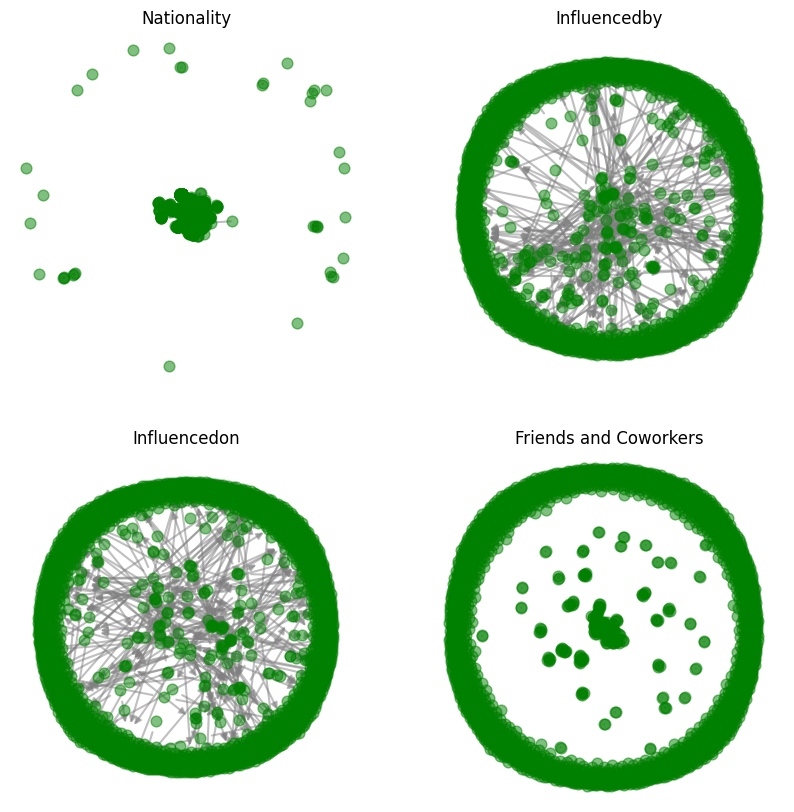

In [ ]:
#Plot the graphs

def plot_4_networks_2d_subplots(graphs, layout_params_list=None):
    fig, axes = plt.subplots(2, 2, figsize=(10,10))
    axes = axes.flatten()
    titles = ["Nationality", "Influencedby", "Influencedon", "Friends and Coworkers"]


    for gi, G in enumerate(graphs):
        layout_params = layout_params_list[gi] if layout_params_list else None
        pos = nx.spring_layout(G, **layout_params) if layout_params else nx.spring_layout(G)

        nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.5, edge_color='grey', ax=axes[gi])
        nx.draw_networkx_nodes(G, pos, node_size=60, node_color='green', alpha=0.5, ax=axes[gi])

        axes[gi].set_title(titles[gi])
        axes[gi].set_axis_off()

    plt.show()

graphs = [G_geo_B, G_influencedby_B, G_influencedon_B, G_friendsandcoworkers_B]
plot_4_networks_2d_subplots(graphs)
    

Plot only the nodes with non-zero neighbors:

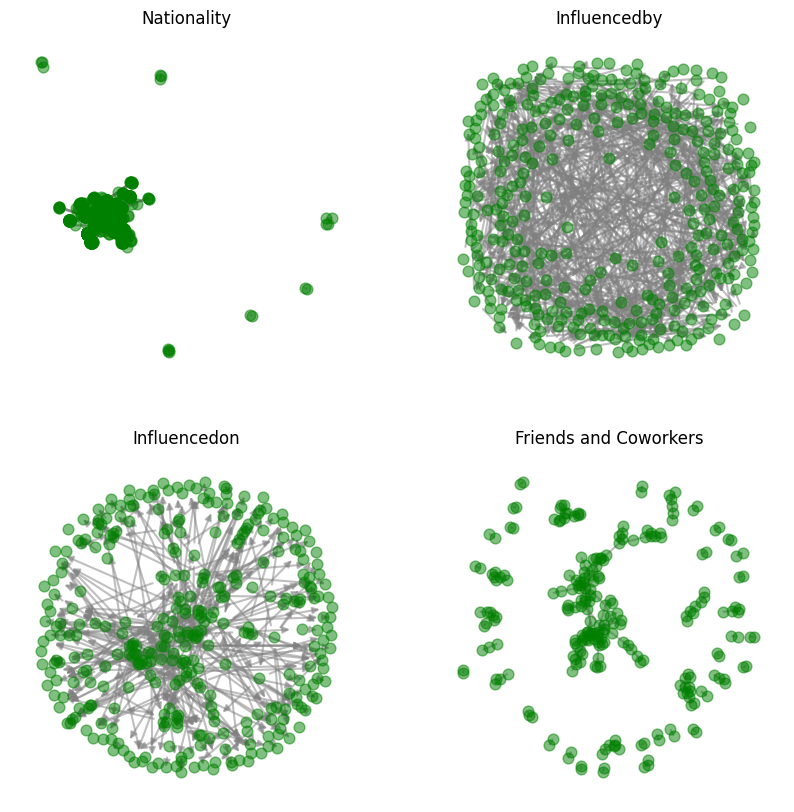

In [ ]:
#Plot only the nodes and edges with threshold  

def threshold_degree(G, threshold):
    G_copy = G.copy()
    for node in G.nodes():
        if G.degree(node) < threshold:
            G_copy.remove_node(node)
    return G_copy

def threshold_weight(G,threshold):
    G_copy = G.copy()
    for edge in G.edges():
        if G[edge[0]][edge[1]]['weight'] < threshold:
            G_copy.remove_edge(edge[0], edge[1])
    return G_copy


G_influencedby_B_copy = threshold_degree(G_influencedby_B, 0.1)
G_influencedon_B_copy = threshold_degree(G_influencedon_B, 0.1)
G_friendsandcoworkers_B_copy = threshold_degree(G_friendsandcoworkers_B, 0.1)

G_geo_B_copy = threshold_weight(G_geo_B, 1/3)
G_geo_B_copy = threshold_degree(G_geo_B_copy, 0.1)


plot_4_networks_2d_subplots([G_geo_B_copy, G_influencedby_B_copy, G_influencedon_B_copy, G_friendsandcoworkers_B_copy], layout_params_list=[None, {'k':8.9, 'iterations':5}, {'k':None, 'iterations':55}, {'k':None, 'iterations':50}])

### InfluencedOn network:

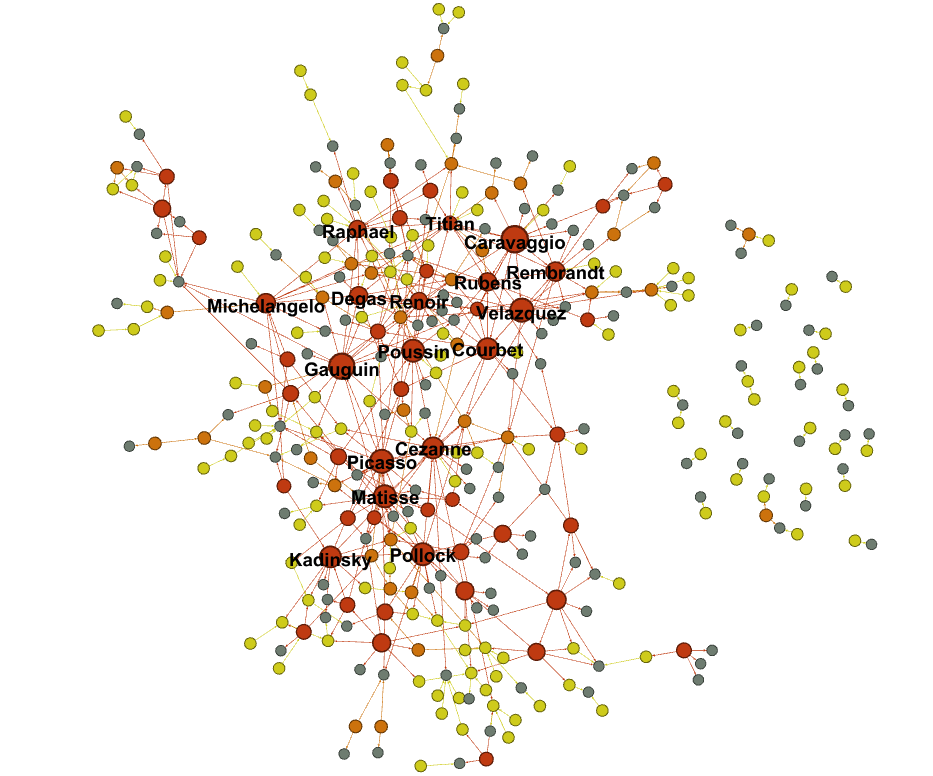

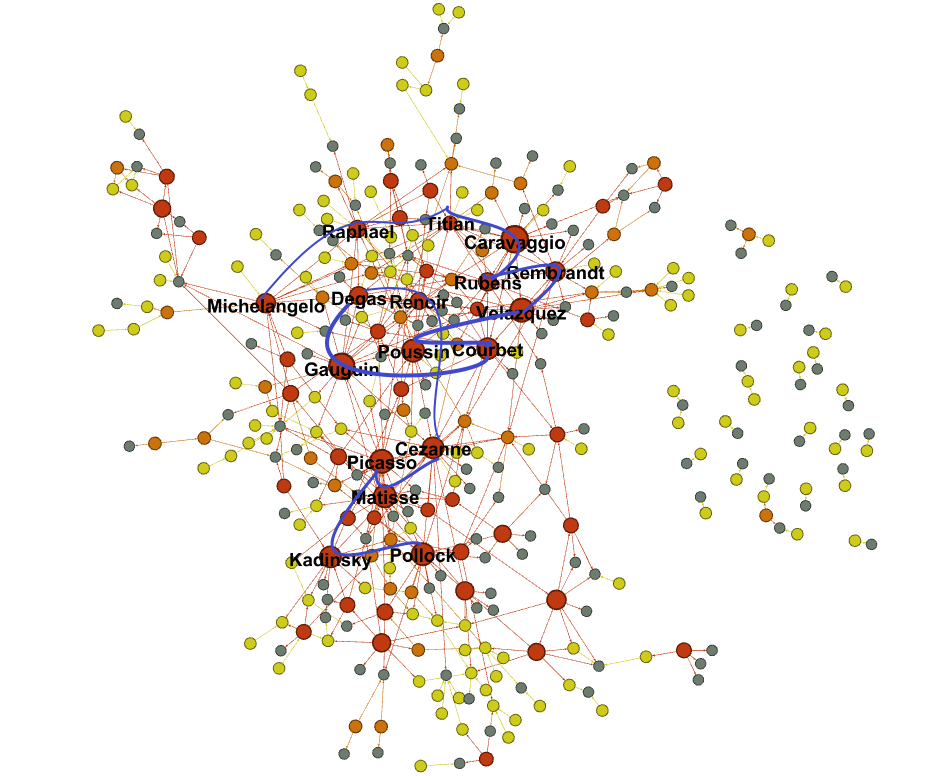

## Save

In [ ]:
#Save graphs to Gephi

#nx.write_gexf(G_geo_B_copy, "gexf/G_geo_B.gexf") #In time_and_place.ipynb much better filtered version
nx.write_gexf(G_influencedby_B_copy, "gexf/G_influencedby_B.gexf")
nx.write_gexf(G_influencedon_B, "gexf/G_influencedon_B.gexf")
nx.write_gexf(G_friendsandcoworkers_B_copy, "gexf/G_friendsandcoworkers_B.gexf")
nx.write_gexf(G_influencedon_B_copy, "gexf/G_influencedon_B2.gexf")
nx.write_gexf(G_artists_B, "gexf/G_artists_B.gexf")


## Reload

In [2]:
G_geo_B_copy = nx.read_gexf("gexf/G_geo_B.gexf")
G_influencedby_B = nx.read_gexf("gexf/G_influencedby_B.gexf")
G_influencedon_B = nx.read_gexf("gexf/G_influencedon_B.gexf")
G_friendsandcoworkers_B_copy = nx.read_gexf("gexf/G_friendsandcoworkers_B.gexf")
G_influencedon_B_copy = nx.read_gexf("gexf/G_influencedon_B2.gexf")
G_artists_B = nx.read_gexf("gexf/G_artists_B.gexf")

In [3]:
artists=pd.read_csv('../datasets/artists.csv')

In [6]:
from operator import itemgetter
import powerlaw as pwl
from collections import Counter 


In [7]:
G = G_influencedon_B_copy.copy()

deg=dict(G.degree()).values()
deg_distri=Counter(deg)

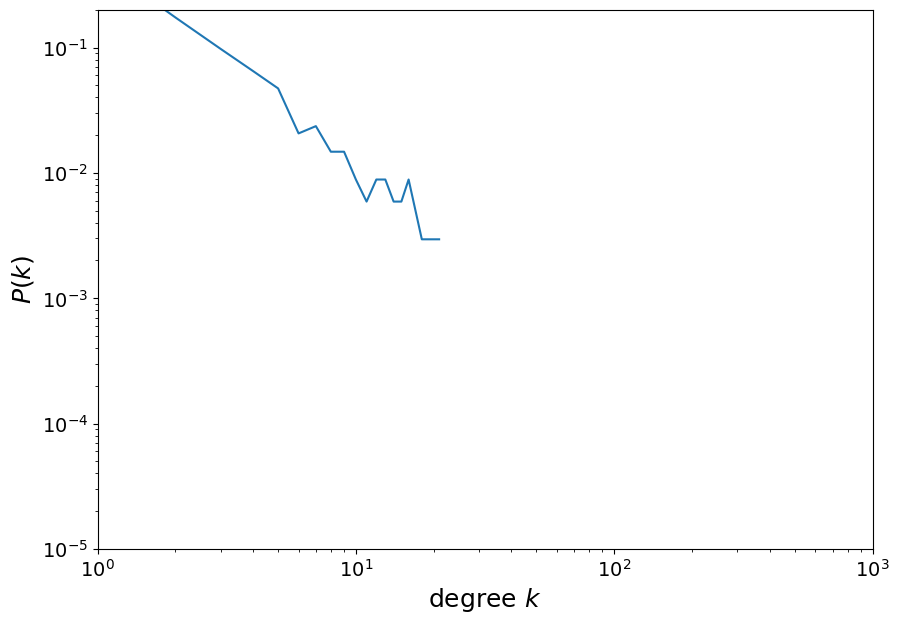

In [8]:
x=[]
y=[]
for i in sorted(deg_distri):   
    x.append(i)
    y.append(deg_distri[i]/len(G))

plt.figure(figsize=(10,7))    
plt.plot(x,y)

plt.xlabel('degree $k$', fontsize=18)
plt.ylabel('$P(k)$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.yscale('log')
plt.xscale('log')
plt.axis([1,1000,0.00001,0.2])
plt.show()

In [9]:
degree=list(deg)
pwl_distri=pwl.pdf(degree)

Text(0, 0.5, '$P(k)$')

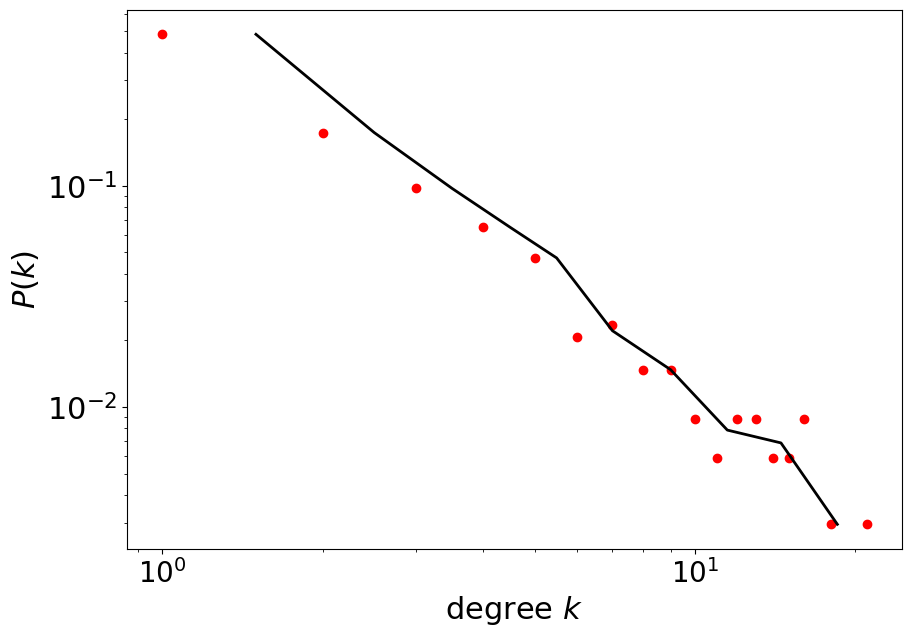

In [10]:
plt.figure(figsize=(10,7))
plt.yscale('log')
plt.xscale('log')

plt.plot(x,y,'ro')

pwl.plot_pdf(degree, color='black', linewidth=2)

plt.xticks(fontsize=20)
plt.yticks(fontsize=22)

plt.xlabel('degree $k$', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

In [11]:
fit_function = pwl.Fit(degree)

Calculating best minimal value for power law fit


In [14]:
fit_function.power_law.alpha

2.7481047399369722

In [15]:
fit_function.power_law.sigma

0.16230745042575168

In [16]:
fit_function.power_law.xmin

3.0

In [18]:
fit_function_fixmin = pwl.Fit(degree, xmin=3)
fit_function_fixmin.power_law.alpha

2.7481047399369722

In [19]:
fit_function_fixmin.power_law.sigma

0.16230745042575168

In [20]:
fit_function.power_law.D

0.11642689525853844

Text(0, 0.5, '$P(k)$')

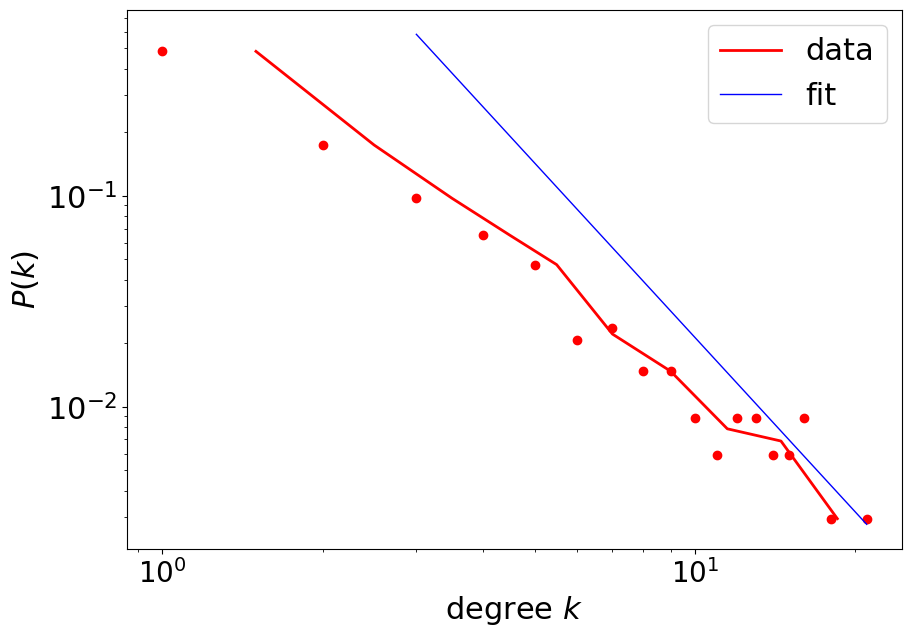

In [23]:
fig=plt.figure(figsize=(10,7))

plt.plot(x,y,'ro')

fig=pwl.plot_pdf([x for x in degree], color='r', linewidth=2, label='data')

fit_function.power_law.plot_pdf(ax=fig, color='b', linestyle='-', linewidth=1, label='fit')

fig.legend(fontsize=22)

plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel('degree $k$', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

In [25]:
fit_function.supported_distributions

{'power_law': powerlaw.Power_Law,
 'lognormal': powerlaw.Lognormal,
 'exponential': powerlaw.Exponential,
 'truncated_power_law': powerlaw.Truncated_Power_Law,
 'stretched_exponential': powerlaw.Stretched_Exponential,
 'lognormal_positive': powerlaw.Lognormal_Positive}

In [26]:
R,p = fit_function.distribution_compare('power_law', 'exponential', normalized_ratio=True)

In [27]:
R,p

(1.458053317022369, 0.1448258474850257)

In [28]:
R2,p2 = fit_function.distribution_compare('power_law', 'lognormal_positive', normalized_ratio=True)
R2,p2

(0.3448701073777836, 0.7301920243466706)

In [29]:
R3,p3 = fit_function.distribution_compare('power_law', 'truncated_power_law', normalized_ratio=True)
R3,p3

Assuming nested distributions


(-1.0963533835433448, 0.11649355978998077)

In [31]:
R4,p4 = fit_function.distribution_compare('truncated_power_law', 'stretched_exponential', normalized_ratio=True)
R4,p4

(3.4407791205217526, 0.0005800418287503853)